## Vehicles Dataset Analysis

In [34]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'C:\Users\ahaqu\Downloads\vehicles_us (1).csv')
df.sample(n=10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
46477,29900,2018.0,ford mustang gt coupe 2d,good,8.0,gas,3827.0,automatic,coupe,yellow,NaN,2019-03-31,43
42128,21000,2017.0,subaru outback,like new,4.0,gas,50977.0,automatic,SUV,NaN,1.0,2018-05-17,31
31714,7490,2014.0,chevrolet cruze,good,4.0,gas,89114.0,other,sedan,NaN,NaN,2018-12-19,22
30417,14500,2013.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-30,10
35197,2500,1975.0,ford f-250,fair,8.0,gas,55000.0,other,truck,NaN,1.0,2019-02-17,26
47673,23800,2019.0,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,1.0,2019-01-19,62
40180,26000,2012.0,toyota tacoma,like new,6.0,gas,60000.0,automatic,truck,blue,1.0,2019-01-24,49
4090,5995,2008.0,ford escape,like new,6.0,gas,87500.0,automatic,SUV,grey,1.0,2018-12-16,8
1771,24495,2017.0,ford f150,excellent,6.0,gas,68302.0,automatic,truck,grey,1.0,2018-09-29,25
3693,2995,2000.0,jeep grand cherokee,fair,6.0,gas,199268.0,automatic,SUV,green,1.0,2018-11-02,31


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [37]:
df.duplicated().sum()

0

In [38]:
df['price'].isna().sum()

0

In [39]:
df['model_year'].isna().sum()

3619

In [40]:
df['model_year']=df['model_year'].fillna(0)
df['model_year'].sample(n=5)

35412    2007.0
20144    2013.0
16154    2005.0
1517     2004.0
39621    2008.0
Name: model_year, dtype: float64

In [41]:
df['condition'].isna().sum()


0

In [42]:
df['cylinders'].isna().sum()
df['cylinders'].fillna('')

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: object

In [43]:
df['condition'].isna().sum()

0

In [44]:
df['days_listed'].isna().sum()

0

In [45]:
df['fuel'].isna().sum()

0

In [46]:
df['model'].isna().sum()

0

In [47]:
df['odometer'].isna().sum()

7892

In [48]:
df['odometer'].fillna('NA')


0        145000.0
1         88705.0
2        110000.0
3              NA
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524          NA
Name: odometer, Length: 51525, dtype: object

In [49]:
df['paint_color'].isna().sum()
df['paint_color'].fillna('NA')

0           NA
1        white
2          red
3           NA
4        black
         ...  
51520    black
51521    white
51522     blue
51523    black
51524       NA
Name: paint_color, Length: 51525, dtype: object

In [50]:
df['price'].isna().sum()

0

In [51]:
df['transmission'].isna().sum()

0

In [52]:
df['price'].astype('float')
df['date_posted'] = pd.to_datetime(df['date_posted'], format = '%Y-%m-%d') 

In [53]:
df['model_year'].info()
df['model_year'].astype('int64')

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: model_year
Non-Null Count  Dtype  
--------------  -----  
51525 non-null  float64
dtypes: float64(1)
memory usage: 402.7 KB


0        2011
1           0
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

In [54]:
df['age']= 2022-df['model_year']
def age_category(x):
    if x<5:return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'
df['age_category']= df['age'].apply(age_category)

In [62]:
df_5 = df[df['age'] < 5]
df_10 = df[(df['age'] >= 5) & (df['age'] < 10)]
df_20 = df[(df['age'] >= 10) & (df['age'] <20)]
df_over20 = df[df['age'] >20]



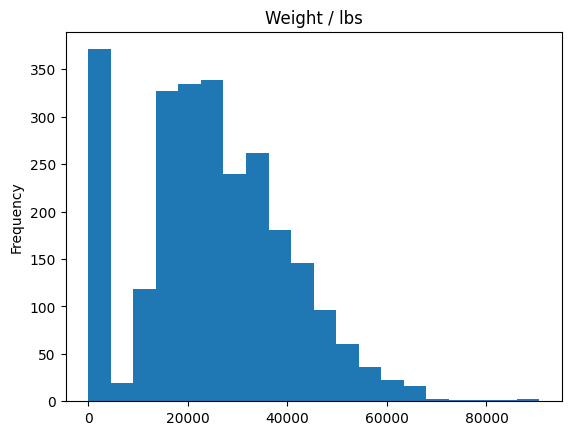

In [61]:
df_5['price'].plot(bins= 20, title ='Weight / lbs',ylabel = 'Frequency', kind= 'hist')
plt.show()

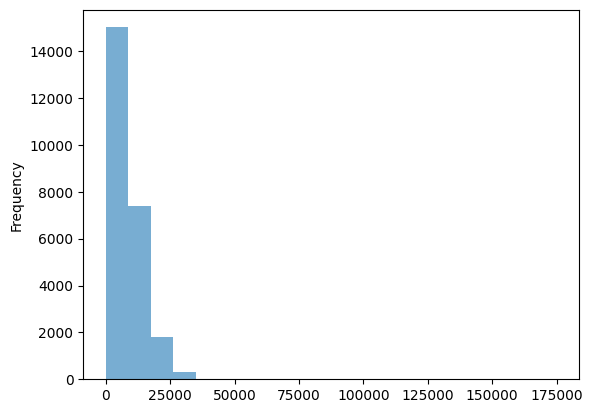

In [63]:
df_20['price'].plot (kind= 'hist', bins=20, alpha=0.6)
plt.show()

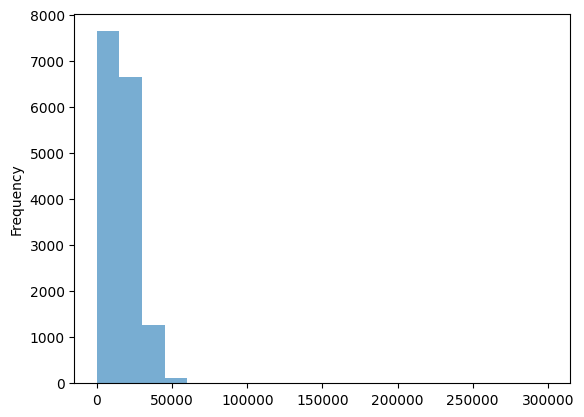

In [66]:
df_10['price'].plot (kind= 'hist', bins=20, alpha=0.6)
plt.show()

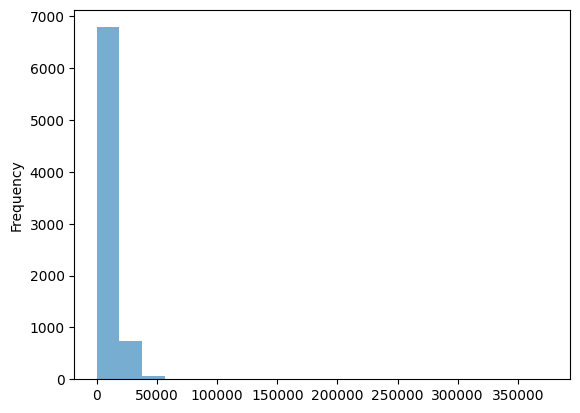

In [65]:
df_over20['price'].plot(kind='hist', bins=20, alpha=0.6)
plt.show()

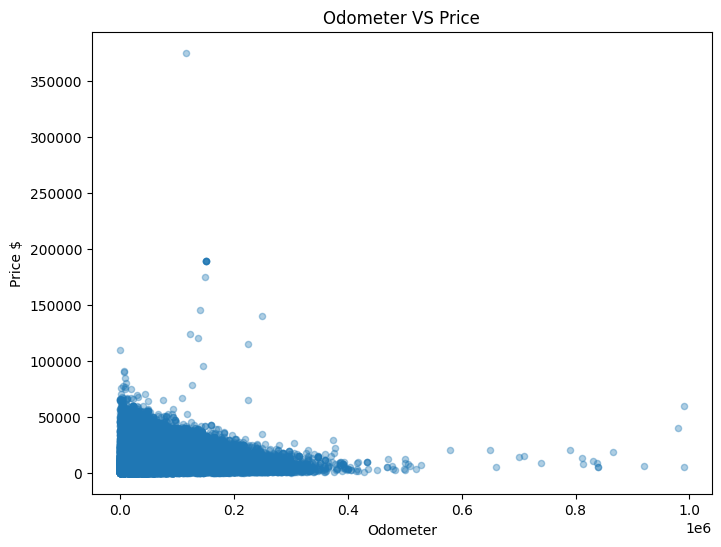

In [56]:
df.plot (x= 'odometer', y= 'price', kind = 'scatter', title = "Odometer VS Price", alpha = 0.36, figsize = [8, 6], xlabel=  'Odometer', ylabel = 'Price $')

plt.show()

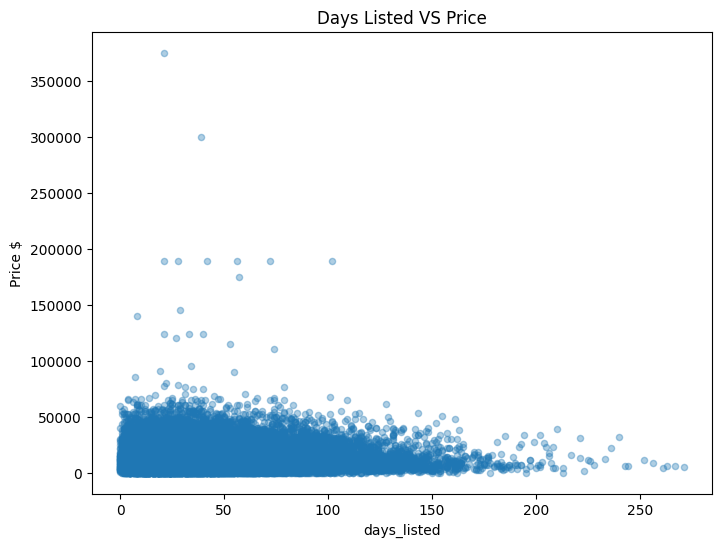

In [ ]:
df.plot (x= 'days_listed', y= 'price', kind = 'scatter', title = "Days Listed VS Price", alpha = 0.36, figsize = [8, 6], xlabel=  'days_listed', ylabel = 'Price $')

plt.show()